In [3]:
import pandas as pd

In [4]:
print(pd.__version__)

0.20.3


In [9]:
w = pd.read_csv("/Users/shreyasurana/Desktop/WinterQuarter/ML/Wine.csv", sep=";")
w.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
wdf= pd.DataFrame(w)
wdf.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
def calculated_acidity(wdf):
    return wdf['fixed acidity'] + wdf['volatile acidity']

wdf['total_acidity'] = wdf.apply(calculated_acidity,axis=1)

In [19]:
wdf.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10


In [26]:
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt

0.8.0


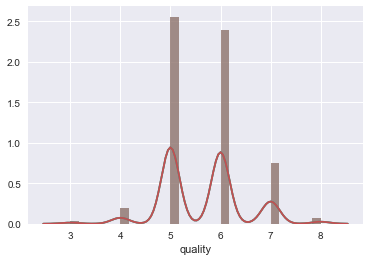

In [27]:
sns.set(color_codes= True)
sns.distplot(wdf['quality'])
plt.show()

In [28]:
import statsmodels.api as sm


/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
model = sm.OLS(wdf['quality'], sm.add_constant (wdf[['total_acidity', 'alcohol','density', 'residual sugar','citric acid']])).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     111.5
Date:                Fri, 05 Jan 2018   Prob (F-statistic):          3.42e-101
Time:                        02:02:22   Log-Likelihood:                -1686.7
No. Observations:                1599   AIC:                             3385.
Df Residuals:                    1593   BIC:                             3418.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.8686     18.534      1.180      0.238     -14.486      58.223
total_acidity      0.0258      0.019      1.389      0.165      -0.011       0.062
alcohol            0.3335      0.022     14.847      0.000       0.289       0.378
density          -20.1605     18.569     -1.086      0.278     -56.584      16.263
residual sugar    -0.0103      0.015     -0.703      0.482      -0.039       0.018
citric acid        0.6782      0.118      5.749      0.000       0.447       0.910
==============================================================================
Omnibus:                       31.948   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.134
Skew:                          -0.174   Prob(JB):                     7.88e-12
Kurtosis:                       3.804   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
! pwd

/Users/shreyasurana/Desktop
